In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive

Mounted at /content/drive
/content/drive/My Drive


In [9]:
#Importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [90]:
#Leer el dataset
df = pd.read_csv('/content/drive/My Drive/IA_UIS/dataset/air_traffic.csv', delimiter=',')

# Muestra las primeras filas del dataset para verificar que se cargó correctamenteD
df.head()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,43032450,4905830,47938280,785160,57667,842827,36211422,12885980,49097402,56191300,17968572,74159872,64.44,71.71,66.20
1,2003,2,41166780,4245366,45412146,690351,51259,741610,34148439,10715468,44863907,50088434,15587880,65676314,68.18,68.74,68.31
2,2003,3,49992700,5008613,55001313,797194,58926,856120,41774564,12567068,54341633,57592901,17753174,75346075,72.53,70.79,72.12
3,2003,4,47033260,4345444,51378704,766260,55005,821265,39465980,10370592,49836572,54639679,15528761,70168440,72.23,66.78,71.02
4,2003,5,49152352,4610834,53763186,789397,55265,844662,41001934,11575026,52576960,55349897,15629821,70979718,74.08,74.06,74.07


In [ ]:
df.describe()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
count,249.000000,249.000000,2.490000e+02,2.490000e+02,2.490000e+02,249.000000,249.000000,249.000000,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,249.000000,249.000000,249.000000
mean,2012.879518,6.445783,5.520971e+07,7.392209e+06,6.260192e+07,706750.710843,64736.172691,771486.883534,4.957803e+07,1.918103e+07,6.875906e+07,6.131822e+07,2.413903e+07,8.545724e+07,79.938394,77.304940,79.286305
std,6.002817,3.442803,1.044055e+07,2.020273e+06,1.229211e+07,107054.971522,12129.622461,115686.728629,1.035558e+07,5.711621e+06,1.548875e+07,8.996673e+06,5.650437e+06,1.382385e+07,8.860562,10.907145,8.895700
min,2003.000000,1.000000,2.877290e+06,1.366090e+05,3.013899e+06,217262.000000,4996.000000,222280.000000,2.551127e+06,3.567620e+05,2.907889e+06,1.948908e+07,1.541419e+06,2.103050e+07,13.090000,23.150000,13.830000
25%,2008.000000,3.000000,5.098217e+07,6.395022e+06,5.766458e+07,662000.000000,61615.000000,727898.000000,4.458029e+07,1.660284e+07,6.182568e+07,5.655552e+07,2.173119e+07,7.919780e+07,77.720000,76.430000,76.940000
50%,2013.000000,6.000000,5.620010e+07,7.419187e+06,6.389913e+07,709933.000000,66557.000000,779011.000000,4.985794e+07,1.968901e+07,6.900519e+07,6.088909e+07,2.464572e+07,8.505191e+07,82.120000,79.910000,81.580000
75%,2018.000000,9.000000,6.089213e+07,8.567847e+06,6.944743e+07,781804.000000,71924.000000,848650.000000,5.568257e+07,2.266760e+07,7.803987e+07,6.626877e+07,2.770535e+07,9.255187e+07,85.240000,82.930000,84.070000
max,2023.000000,12.000000,7.537816e+07,1.243262e+07,8.781077e+07,890938.000000,82681.000000,964102.000000,7.226790e+07,3.137600e+07,1.036439e+08,8.199740e+07,3.532619e+07,1.173122e+08,89.960000,89.440000,89.140000


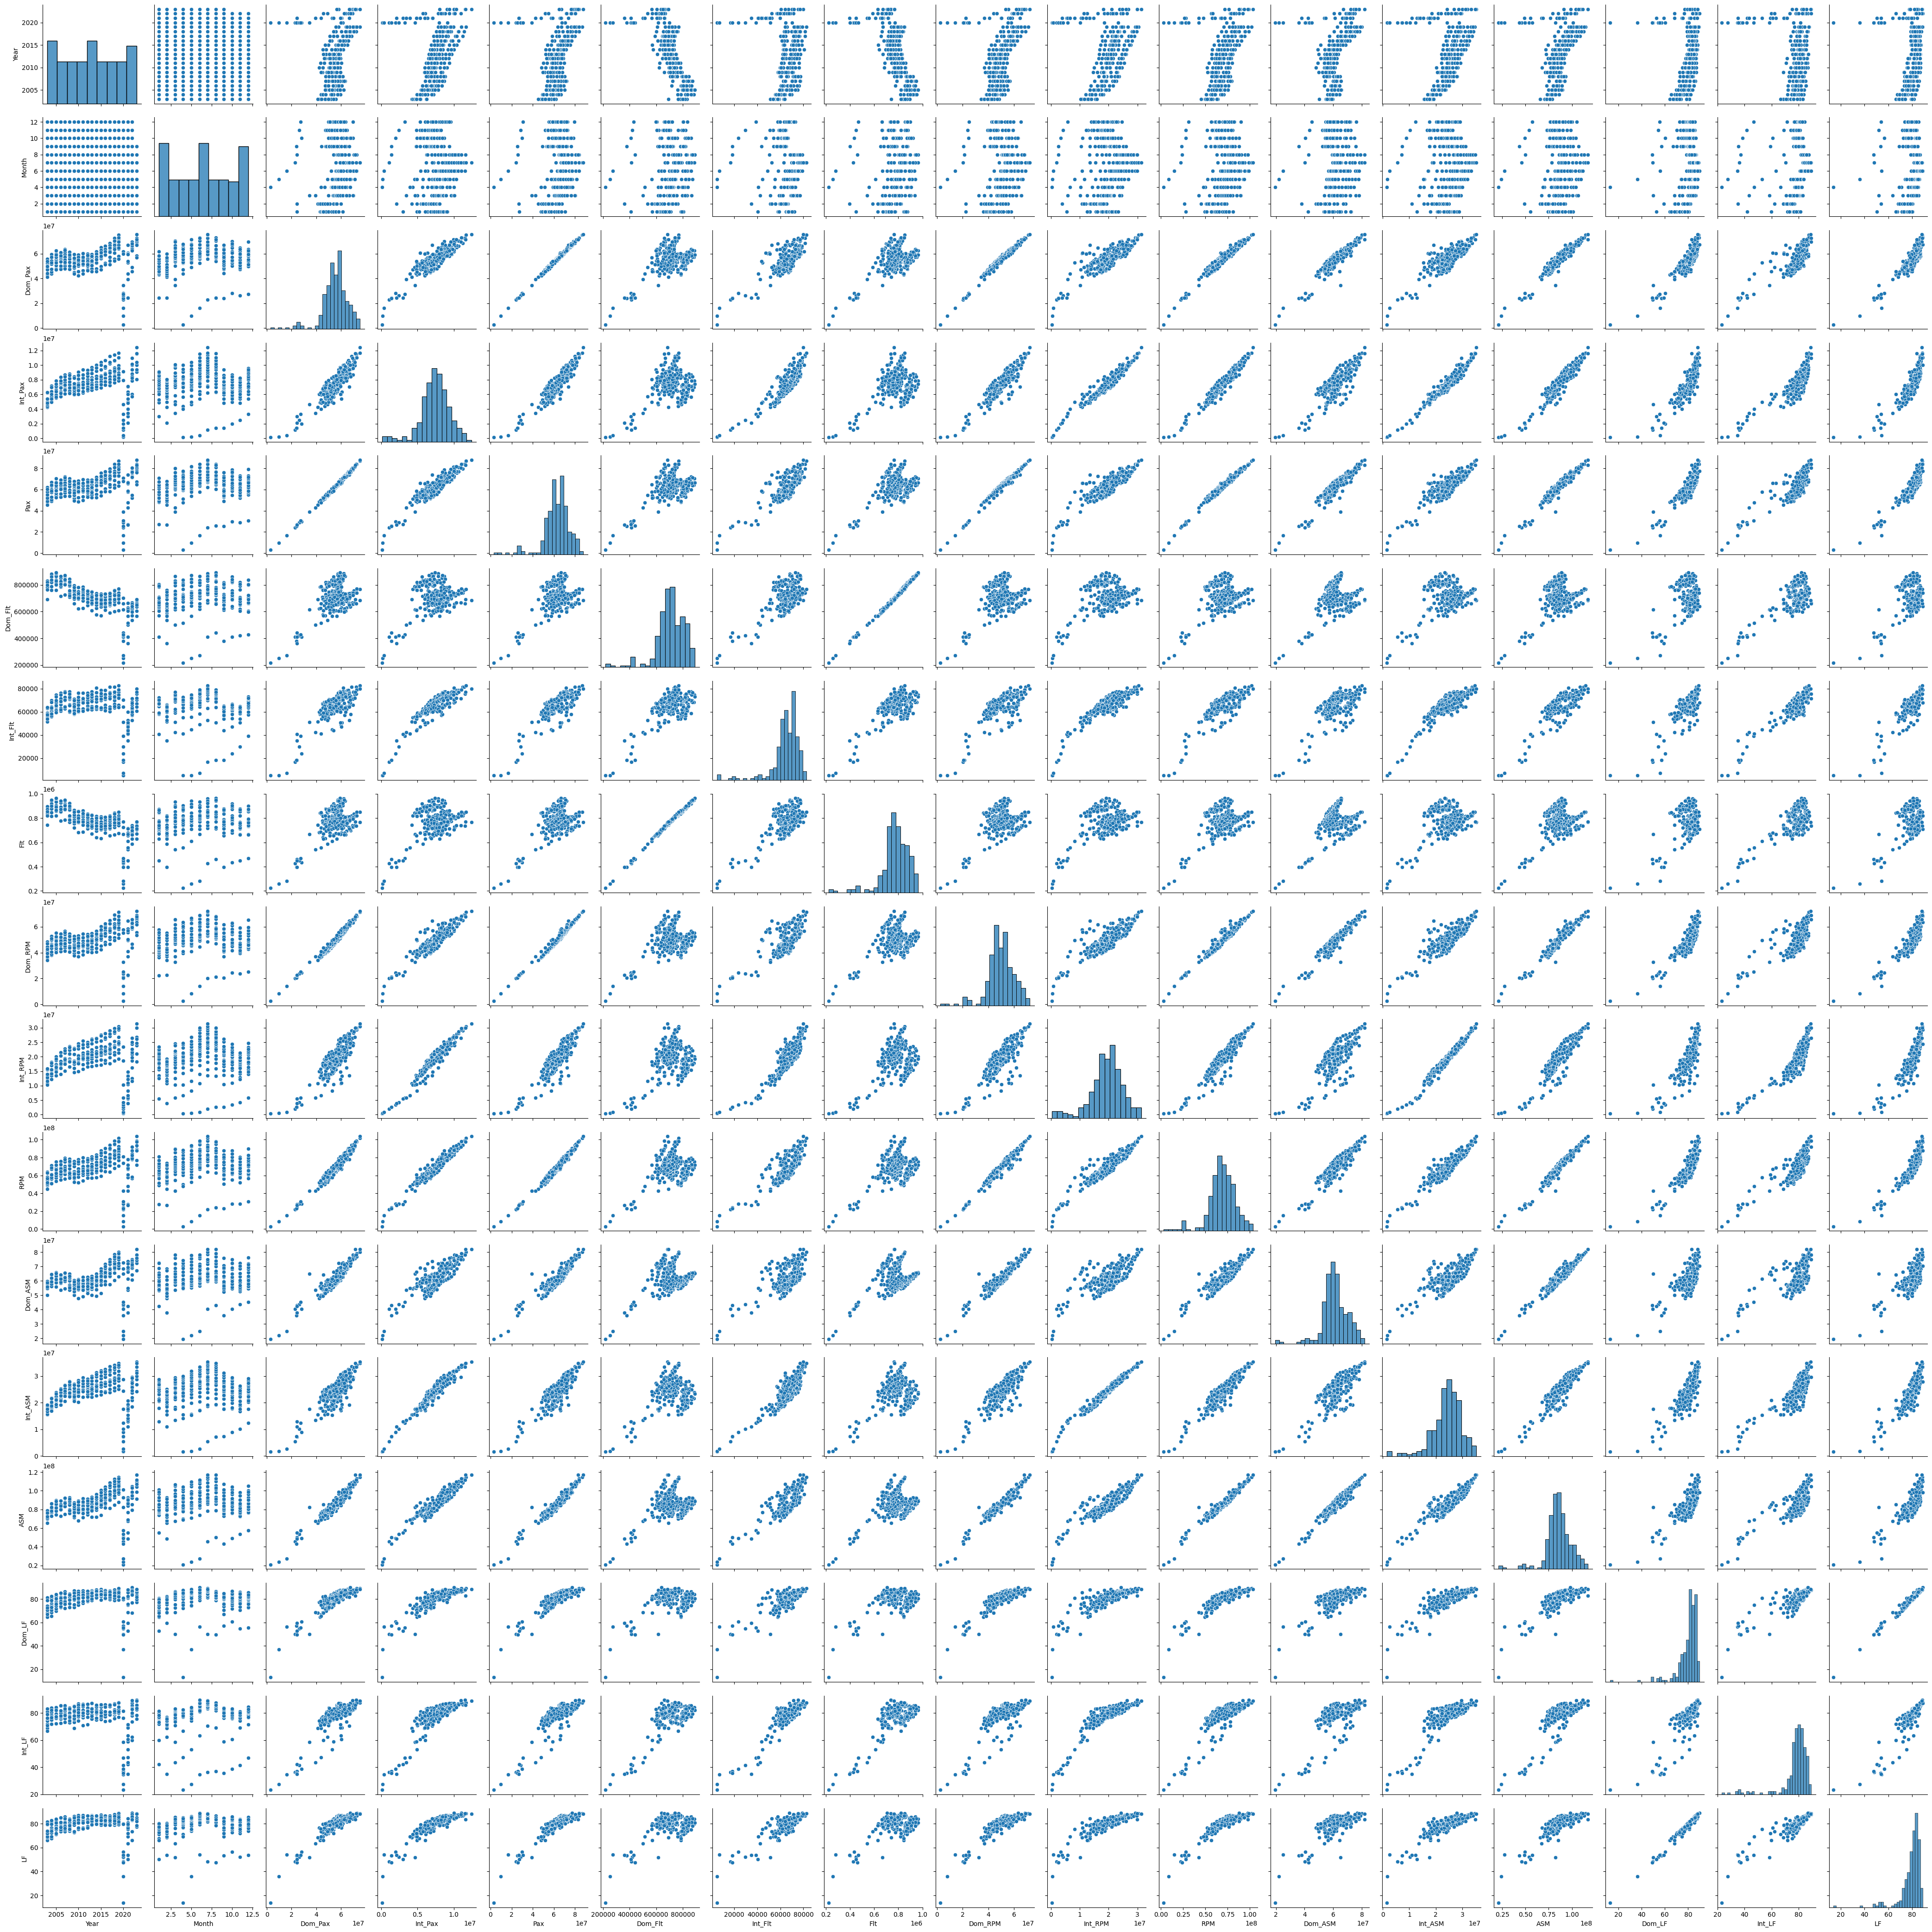

In [ ]:
sns.pairplot(df)
plt.show()

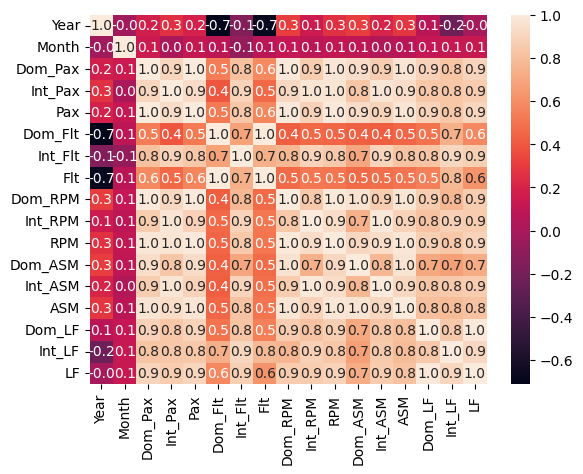

In [ ]:
sns.heatmap(df.corr(), annot= True,fmt=".1f");

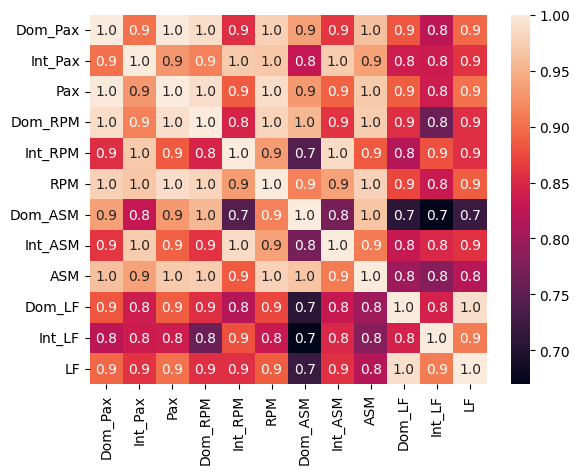

In [ ]:
df2 = df.drop(['Year', 'Month', 'Dom_Flt', 'Int_Flt', 'Flt'], axis=1)
sns.heatmap(df2.corr(), annot= True,fmt=".1f");

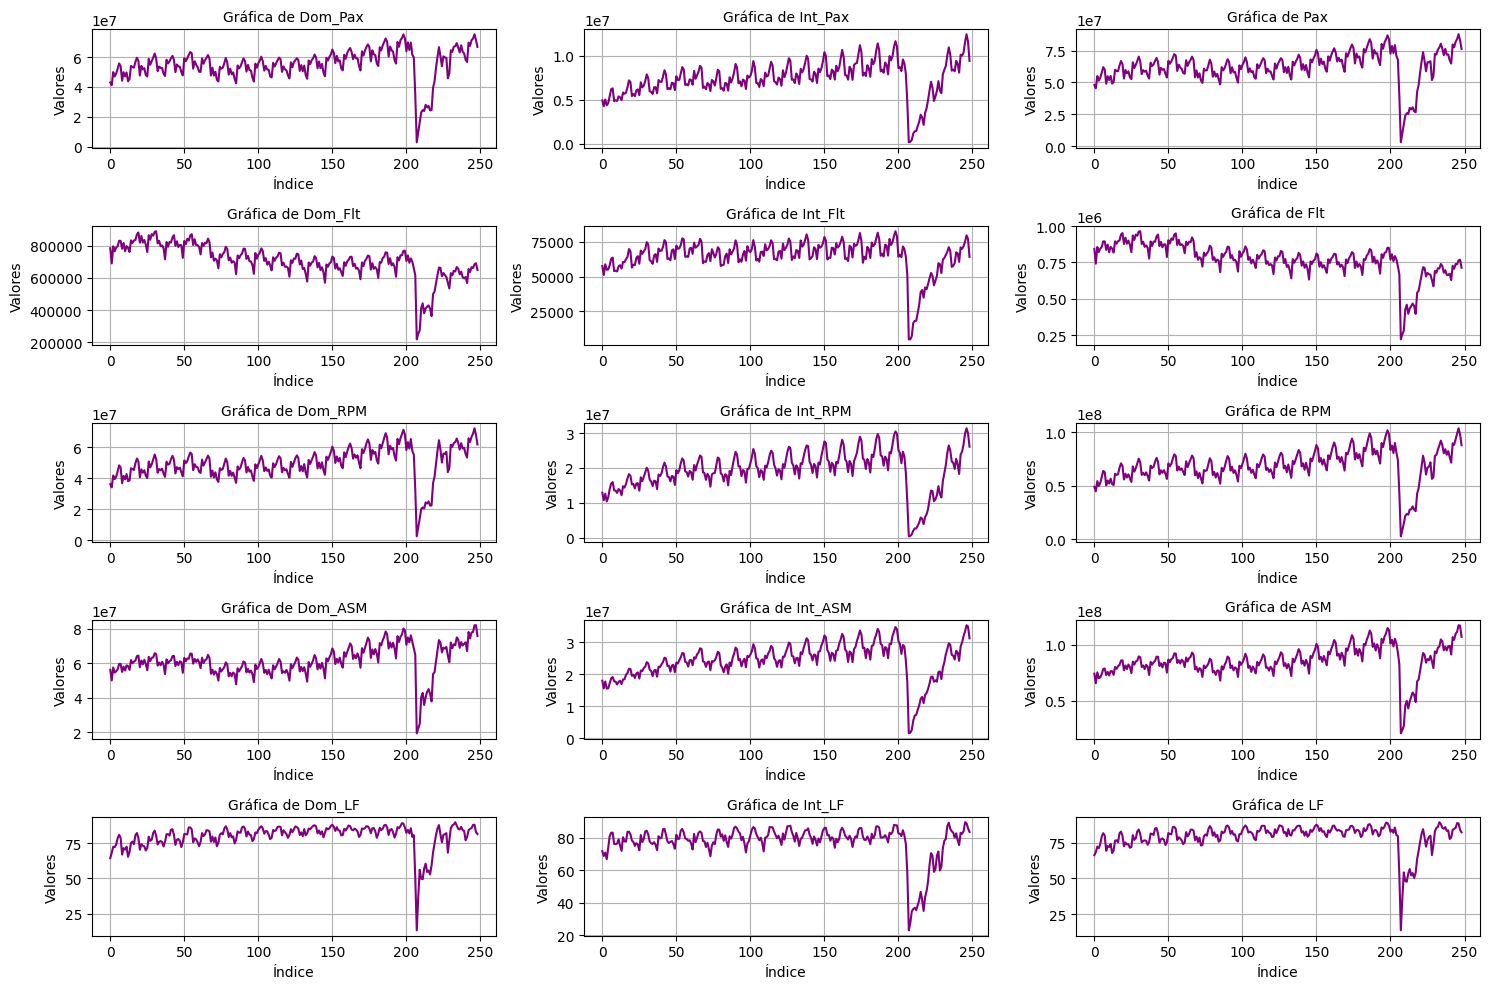

In [ ]:
# Excluir las dos primeras columnas (year y month)
columns_to_plot = df.columns[2:]

# Número de columnas a graficar
n_columns = len(columns_to_plot)

# Definir el tamaño de la cuadrícula (3 filas, 5 columnas)
fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Aplanar la matriz de ejes para facilitar el recorrido
axes = axes.flatten()

# Generar una gráfica para cada columna (excluyendo year y month)
for i, column in enumerate(columns_to_plot):
    axes[i].plot(df[column], color='purple', label=column)
    axes[i].set_title(f'Gráfica de {column}', fontsize=10)
    axes[i].set_xlabel('Índice')
    axes[i].set_ylabel('Valores')
    axes[i].grid(True)

# Eliminar los subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espaciado entre las subgráficas
plt.tight_layout()

# Mostrar todas las gráficas
plt.show()


In [40]:
print(df)

     Year  Month   Dom_Pax   Int_Pax       Pax  Dom_Flt  Int_Flt     Flt  \
0    2003      1  43032450   4905830  47938280   785160    57667  842827   
1    2003      2  41166780   4245366  45412146   690351    51259  741610   
2    2003      3  49992700   5008613  55001313   797194    58926  856120   
3    2003      4  47033260   4345444  51378704   766260    55005  821265   
4    2003      5  49152352   4610834  53763186   789397    55265  844662   
..    ...    ...       ...       ...       ...      ...      ...     ...   
244  2023      5  71423653  10358666  81782319   667331    71924  739255   
245  2023      6  72482621  11544505  84027126   661293    75279  736572   
246  2023      7  75378157  12432615  87810772   684939    79738  764677   
247  2023      8  71477988  11572149  83050137   691482    77137  768619   
248  2023      9  66858490   9392985  76251475   649308    64241  713549   

      Dom_RPM   Int_RPM        RPM   Dom_ASM   Int_ASM        ASM  Dom_LF  \
0    36211

#**Preparación de datos para regresión**

In [91]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(21)

# Ground truth: "Flt"
df = df[['Year', 'Month', 'Pax', 'Flt', 'RPM', 'ASM', 'LF']]


# Definir características (X) y la variable objetivo (y)
X = df.drop(columns=['Flt'], axis=1)  # Eliminar la columna "Flt" de las características
y = df["Flt"]  # Usar "Flt" como el ground truth

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=21)

print("Características (X):\n", X.head())
print("Variable objetivo (y):\n", y.head())

print("Cantidad de datos:", X.shape)

Características (X):
    Year  Month       Pax       RPM       ASM     LF
0  2003      1  47938280  49097402  74159872  66.20
1  2003      2  45412146  44863907  65676314  68.31
2  2003      3  55001313  54341633  75346075  72.12
3  2003      4  51378704  49836572  70168440  71.02
4  2003      5  53763186  52576960  70979718  74.07
Variable objetivo (y):
 0    842827
1    741610
2    856120
3    821265
4    844662
Name: Flt, dtype: int64
Cantidad de datos: (249, 6)


#**Función tunning de parametros para Regresión**


In [92]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
np.random.seed(21)

def show_curve(est, param_name, param_values, X, y):
    means, stds = [], []
    for param_value in param_values:
        kwargs = {param_name: None if param_value == 0 else param_value} #desempaquetar los parametos dentro de los param values
        est.set_params(**kwargs)# {"a":a, "b":b} --> fn(a, b, c)

        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True, random_state=21), scoring='neg_mean_squared_error')
        means.append(-np.mean(s))
        stds.append(np.std(s))
        print(f"{param_name}: {param_value}, Mean MSE: {np.mean(s):.3f}, Std: {np.std(s):.3f}")

    means = np.array(means)
    stds = np.array(stds)

    plt.plot(param_values, means, label="mean", color="black")
    plt.fill_between(param_values, means - stds, means + stds, color="blue", alpha=0.5, label="std")
    plt.xlabel(param_name)
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()

# **Función tunning de parametros para n-folds**

In [93]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

def show_curve_nfolds(est):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

#**Decision Tree Regressor**
Parametros por defecto

In [95]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
np.random.seed(21)


regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


print("MSE  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))
print()
s = cross_val_score(regressor, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE con cross_val_score:  %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))


MSE  915894961.020
RMSE  30263.757
MAE  22963.420

MSE con cross_val_score:  680936912.636 (+/- 435235555.11322)


**Tunning de parametros (DecisionTreeRegressor)**


max_depth: 0, Mean MSE: -865458509.424, Std: 434094872.090
max_depth: 10, Mean MSE: -806537792.504, Std: 381493499.250
max_depth: 20, Mean MSE: -865458509.424, Std: 434094872.090
max_depth: 30, Mean MSE: -865458509.424, Std: 434094872.090


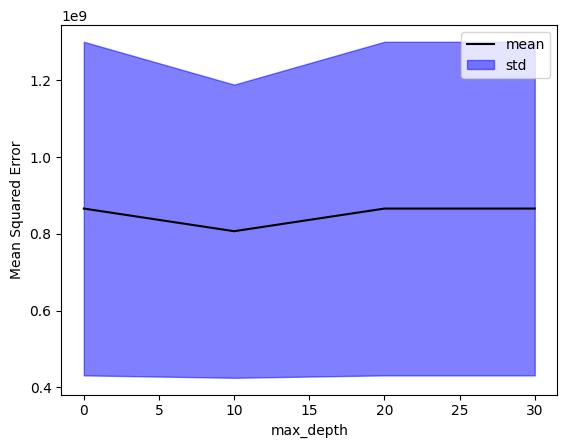

criterion: squared_error, Mean MSE: -865458509.424, Std: 434094872.090
criterion: absolute_error, Mean MSE: -995225857.586, Std: 389940673.719
criterion: poisson, Mean MSE: -868080771.275, Std: 499497827.727


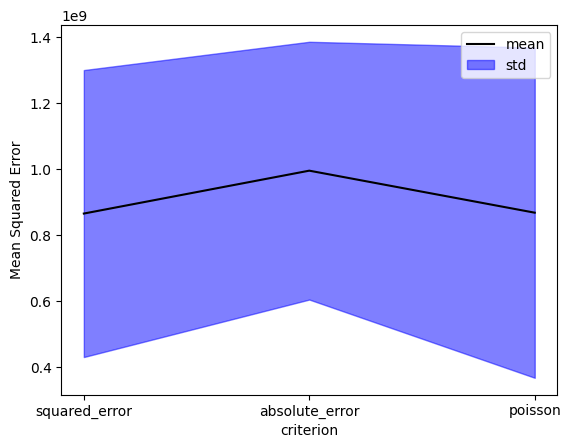

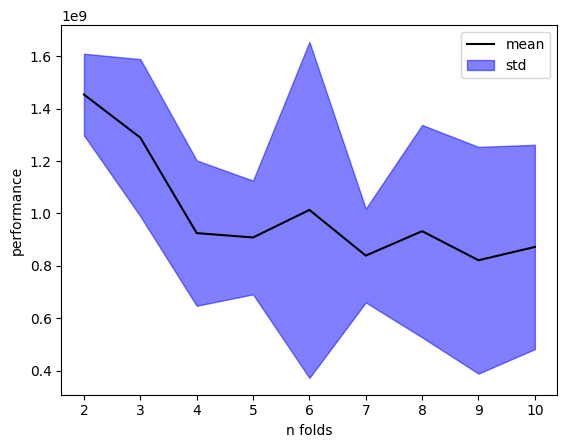

In [96]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
np.random.seed(21)

#max_depth
max_depth_values = [0, 10, 20, 30]
show_curve(DecisionTreeRegressor(random_state=21), 'max_depth', max_depth_values, X, y)

#criterion
criterion_values = ["squared_error", "absolute_error", "poisson"]
show_curve(DecisionTreeRegressor(random_state=21), 'criterion', criterion_values, X, y)

# N-folds
show_curve_nfolds(DecisionTreeRegressor(random_state=21))

**DecisionTreeRegressor con tunning de parametros**

In [97]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
np.random.seed(21)


regressor = DecisionTreeRegressor(max_depth= 10, criterion= 'poisson')
regressor.fit(X_train, y_train)


print("MSE  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))
print()
s = cross_val_score(regressor, X, y, cv=KFold(9, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE con cross_val_score:  %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE  888046899.386
RMSE  29800.116
MAE  23431.342

MSE con cross_val_score:  841085025.884 (+/- 374044628.90688)


**DecisionTreeRegressor con tunning de parametros n-folds**

In [98]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
np.random.seed(21)


regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


print("MSE  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))
print()
s = cross_val_score(regressor, X, y, cv=KFold(9, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE con cross_val_score:  %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE  915894961.020
RMSE  30263.757
MAE  22963.420

MSE con cross_val_score:  826814353.464 (+/- 370249783.25206)


#**Random Forest Regressor**
Parametros por defecto

In [99]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
np.random.seed(21)


# Entrenamiento
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Error
print("MSE  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

s = cross_val_score(regressor, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE con cross_val_score:  %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE  376922944.160
RMSE  19414.503
MAE  14563.514
MSE con cross_val_score:  625869809.028 (+/- 410635612.12244)


**Tunning de parametros (RandomForestRegressor)**

n_estimators: 10, Mean MSE: -440801870.482, Std: 132731488.686
n_estimators: 50, Mean MSE: -460280248.619, Std: 246412144.615
n_estimators: 100, Mean MSE: -463727140.649, Std: 241625549.984


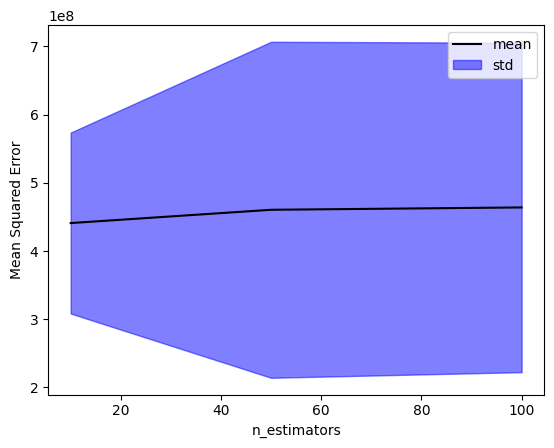

criterion: squared_error, Mean MSE: -463727140.649, Std: 241625549.984
criterion: absolute_error, Mean MSE: -498535404.060, Std: 269118172.938
criterion: poisson, Mean MSE: -454015523.591, Std: 219716505.891


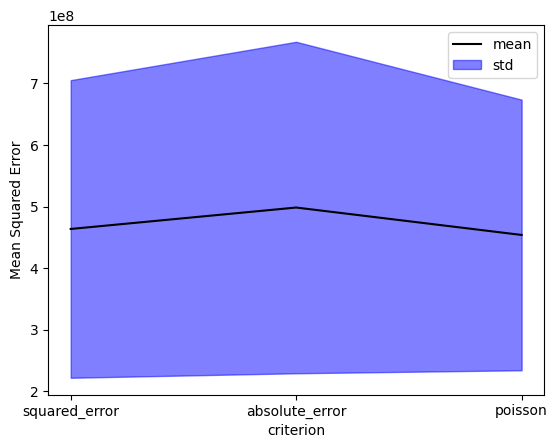

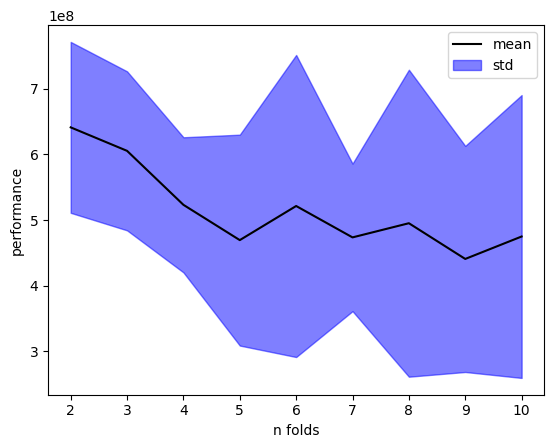

In [100]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
np.random.seed(21)

#n_estimators
n_estimators_values = [10, 50, 100]
show_curve(RandomForestRegressor(random_state=21), 'n_estimators', n_estimators_values, X, y)

#criterion
criterion_values = ["squared_error", "absolute_error", "poisson"]
show_curve(RandomForestRegressor(random_state=21), 'criterion', criterion_values, X, y)

# N-folds
show_curve_nfolds(RandomForestRegressor(random_state=21))

**RandomForestRegressor con tunning de parametros**

In [101]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
np.random.seed(21)

regressor = RandomForestRegressor(n_estimators = 100, criterion = 'squared_error')
regressor.fit(X_train, y_train)

print("MSE  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

s = cross_val_score(regressor, X, y, cv=KFold(9, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE con cross_val_score:  %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE  376922944.160
RMSE  19414.503
MAE  14563.514
MSE con cross_val_score:  619588287.685 (+/- 378301174.31134)


**RandomForestRegressor con tunning de parametros n-folds**

In [102]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
np.random.seed(21)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

print("MSE  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

s = cross_val_score(regressor, X, y, cv=KFold(9, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE con cross_val_score:  %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE  376922944.160
RMSE  19414.503
MAE  14563.514
MSE con cross_val_score:  619588287.685 (+/- 378301174.31134)


#**Support Vector Regressor**

Parametros por defecto

In [103]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
np.random.seed(21)


regressor = SVR()
regressor.fit(X_train, y_train)

print("MSE  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

s = cross_val_score(regressor, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE con cross_val_score:  %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE  9194437335.860
RMSE  95887.629
MAE  72730.480
MSE con cross_val_score:  13454285784.002 (+/- 5950028818.26628)


**Tunning de parametros (SuportVectorMachine)**

kernel: poly, Mean MSE: -13459131127.519, Std: 5987192895.411
kernel: rbf, Mean MSE: -13461232585.548, Std: 5988677284.437


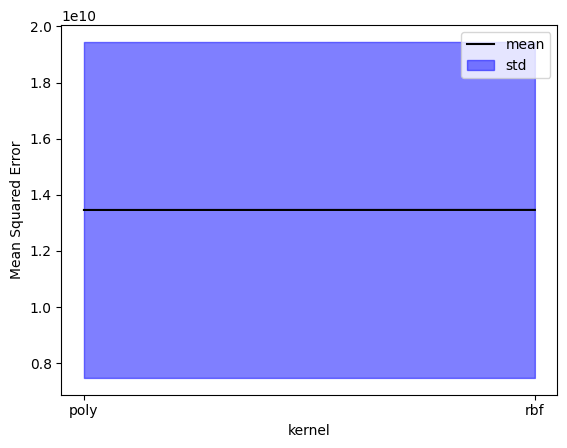

gamma: 1, Mean MSE: -13461551134.334, Std: 5988876107.110
gamma: 10, Mean MSE: -13461551134.334, Std: 5988876107.110
gamma: 20, Mean MSE: -13461551134.334, Std: 5988876107.110
gamma: 60, Mean MSE: -13461551134.334, Std: 5988876107.110
gamma: 100, Mean MSE: -13461551134.334, Std: 5988876107.110


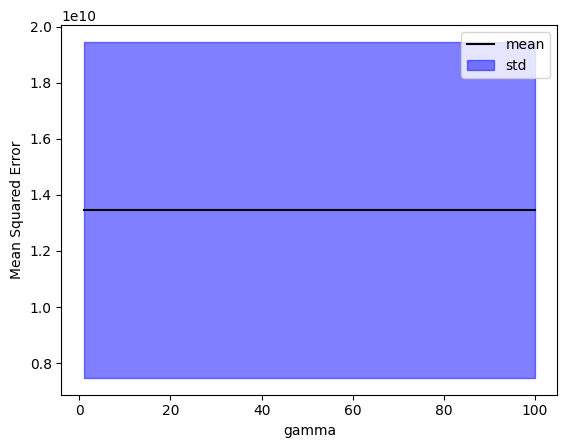

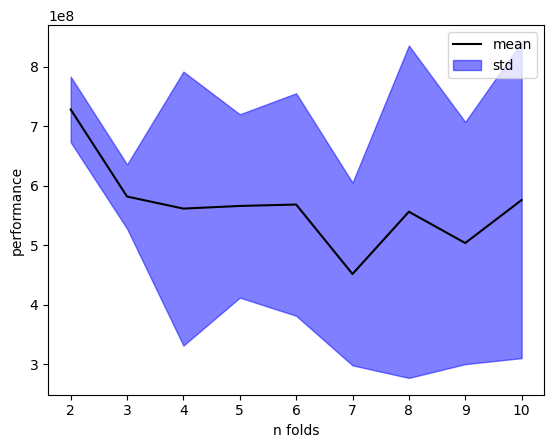

In [104]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
np.random.seed(21)


#kernel
kernel_values = ['poly', 'rbf']
show_curve(SVR(), 'kernel', kernel_values, X, y)

#gamma
gamma_values = [1, 10, 20, 60, 100]
show_curve(SVR(), 'gamma', gamma_values, X, y)

# N-folds
show_curve_nfolds(RandomForestRegressor(random_state=21))

**SuportVectorMachine con tunning de parametros**

In [105]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
np.random.seed(21)


regressor = SVR(kernel = 'poly')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


# Error
print("MSE  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

s = cross_val_score(regressor, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE con cross_val_score:  %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE  9193376265.817
RMSE  95882.096
MAE  72726.117
MSE con cross_val_score:  13452183976.463 (+/- 5948650570.16863)


**SuportVectorMachine con tunning de parametros n-folds**

In [106]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
np.random.seed(21)


regressor = SVR()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


# Error
print("MSE  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

s = cross_val_score(regressor, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE con cross_val_score:  %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE  9194437335.860
RMSE  95887.629
MAE  72730.480
MSE con cross_val_score:  13467887416.386 (+/- 5183430928.53022)


**Modelo de perceptron multicapa con 3 capas ocultas**

In [107]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
np.random.seed(21)

# Columnas seleccionadas para el modelo
df = df[['Year', 'Month', 'Pax', 'Flt', 'RPM', 'ASM', 'LF']]

# (X) es el dataset completo sin el ground truth y (y) es el ground truth
X = df.drop(columns=['Flt'], axis=1)  # Eliminar la columna "Flt" de las características
y = df["Flt"]  # Usar "Flt" como el ground truth

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Modelo de DeepLearning con 3 capas ocultas
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(1)
])

#Complilacion del modelo y calculo de la metrica
model.compile(optimizer=tf.keras.optimizers.SGD(),
            loss='crossentropy',
            metrics=['mae'])
model.fit(X_train, y_train, epochs=10, verbose=1)
y_pred = model.predict(X_test, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12469926.0000 - mae: 11526750.0000
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12221636.0000 - mae: 11203480.0000  
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12366709.0000 - mae: 11327182.0000 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12468006.0000 - mae: 11477542.0000 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12371249.0000 - mae: 11554912.0000 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12498475.0000 - mae: 11399467.0000 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12588400.0000 - mae: 11510516.0000 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12436467.0000 - mae: 11374628.0000 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12411582.0000 - mae: 11415394.0000 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12412959.0000 - mae: 11451525.0000 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


**Modelo de perceptron multicapa con 6 capas ocultas**

In [108]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
np.random.seed(21)

# Columnas seleccionadas para el modelo
df = df[['Year', 'Month', 'Pax', 'Flt', 'RPM', 'ASM', 'LF']]


# (X) es el dataset completo sin el ground truth y (y) es el ground truth
X = df.drop(columns=['Flt'], axis=1)  # Eliminar la columna "Flt" de las características
y = df["Flt"]  # Usar "Flt" como el ground truth

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Modelo de DeepLearning con 6 capas ocultas
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dense(1)
])

#Complilacion del modelo y calculo de la metrica
model.compile(optimizer=tf.keras.optimizers.SGD(),
            loss='crossentropy',
            metrics=['mae'])
model.fit(X_train, y_train, epochs=10, verbose=1)
y_pred = model.predict(X_test, verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 12305754.0000 - mae: 1183772.0000
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12392081.0000 - mae: 1188988.5000
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12464731.0000 - mae: 1197411.3750
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12437109.0000 - mae: 1198829.5000
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12380000.0000 - mae: 1197696.8750
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12311742.0000 - mae: 1182214.6250
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12311704.0000 - mae: 1188656.7500
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12457598.0000 - mae: 1194972.0000
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12357722.0000 - mae: 1192725.6250
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12244111.0000 - mae: 1178655.7500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


**Modelo de perceptron multicapa con 10 capas ocultas**

In [110]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
np.random.seed(21)

# Columnas seleccionadas para el modelo
df = df[['Year', 'Month', 'Pax', 'Flt', 'RPM', 'ASM', 'LF']]


# (X) es el dataset completo sin el ground truth y (y) es el ground truth
X = df.drop(columns=['Flt'], axis=1)  # Eliminar la columna "Flt" de las características
y = df["Flt"]  # Usar "Flt" como el ground truth

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


# Modelo de DeepLearning con 10 capas ocultas
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dense(1)
])

#Complilacion del modelo y calculo de la metrica
model.compile(optimizer=tf.keras.optimizers.SGD(),
            loss='crossentropy',
            metrics=['mae'])
model.fit(X_train, y_train, epochs=10, verbose=1)
y_pred = model.predict(X_test, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 672ms/step - loss: -12267827.0000 - mae: 718746.1250
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 677ms/step - loss: -12167805.0000 - mae: 713633.3750
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 987ms/step - loss: -12247862.0000 - mae: 718134.8125
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 656ms/step - loss: -12172607.0000 - mae: 713702.6875
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 653ms/step - loss: -12287105.0000 - mae: 720579.9375
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 951ms/step - loss: -12271196.0000 - mae: 719846.7500
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 637ms/step - loss: -12197432.0000 - mae: 715417.8750
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 767ms/step - loss: -12313650.0000 - mae: 721147.6250
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: -12346080.0000 - mae: 724335.4375
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 648ms/step - loss: -12288422.0000 - mae: 720356.0625
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
